# Task - 3: Unsupervised Machine Learning

Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In this task I used the "Elbow Method" to predict the optimum number of clusters.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('D:\The Sparks Foundation\Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Dividing Data

In [3]:
target = pd.DataFrame(data['Species'])
target1 = pd.DataFrame(data['Species'].map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2}))
data = data.drop('Species',axis = 1)
data = data.drop('Id',axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Elbow Method

In [6]:
clusters = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(data)
    clusters.append(kmeans.inertia_)
clusters

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.46400663145227,
 29.95408642103723,
 27.951068514818523,
 26.12385137085138]

Text(0, 0.5, 'Sepal')

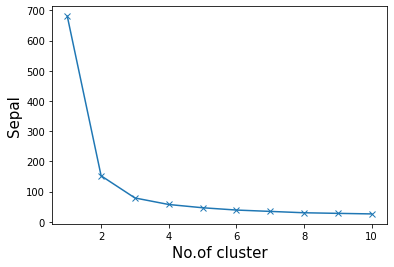

In [7]:
plt.plot(range(1,11),clusters,marker="x")
plt.xlabel('No.of cluster',size=15)
plt.ylabel('Sepal',size=15)

# K-Means Clustering

In [8]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [9]:
data_with_cluster = data.copy()
data_with_cluster['clusters'] = kmeans.fit_predict(data)
data_with_cluster['actual_species'] = target1['Species']
data_with_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters,actual_species
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


# Actual Clustering

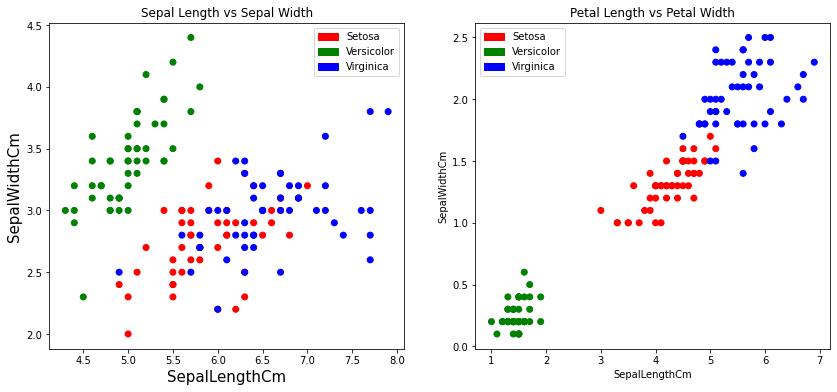

In [21]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
# iris_targets_legend = np.array(iris_data.target_names)
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(data_with_cluster['SepalLengthCm'], data_with_cluster['SepalWidthCm'], c=colors[data_with_cluster['actual_species']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('SepalLengthCm',size=15)
plt.ylabel('SepalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(data_with_cluster['PetalLengthCm'], data_with_cluster['PetalWidthCm'], c= colors[data_with_cluster['actual_species']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

# Predicted Clustering

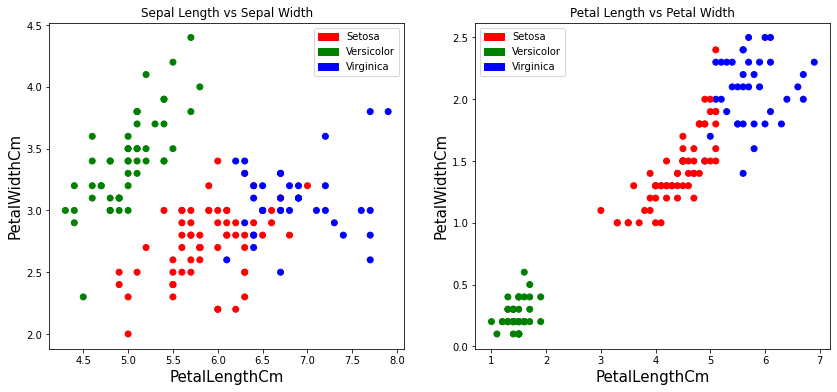

In [14]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
# iris_targets_legend = np.array(iris_data.target_names)
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(data_with_cluster['SepalLengthCm'], data_with_cluster['SepalWidthCm'], c=colors[data_with_cluster['clusters']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(data_with_cluster['PetalLengthCm'], data_with_cluster['PetalWidthCm'], c= colors[data_with_cluster['clusters']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()